In [48]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [49]:
dataframe = pd.read_csv('passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

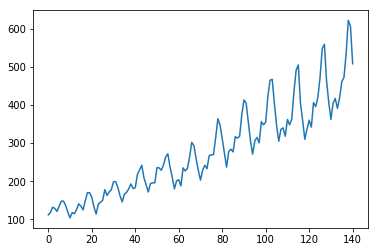

In [50]:
plt.plot(dataset)
plt.show()

In [51]:
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [54]:
def create_dataset(dataset, look_back, out_num):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - out_num + 1):
        a = dataset[i:(i+look_back)]
        b = dataset[(i+look_back):(i+look_back+out_num)]
        dataX.append(a)
        dataY.append(b)
    return numpy.array(dataX),numpy.array(dataY)

In [55]:
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back, 1)
testX,testY = create_dataset(testlist,look_back, 1)

In [56]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

In [135]:
# arr = numpy.arange(0,20)
# x1, y1 = create_dataset(arr, 2, 5)

In [57]:
n_steps_in, n_steps_out = 1, 1
n_features = 1

# define model【Vanilla LSTM】
model = Sequential()
model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(4, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
97/97 - 0s - loss: 0.0472
Epoch 2/100
97/97 - 0s - loss: 0.0249
Epoch 3/100
97/97 - 0s - loss: 0.0187
Epoch 4/100
97/97 - 0s - loss: 0.0175
Epoch 5/100
97/97 - 0s - loss: 0.0171
Epoch 6/100
97/97 - 0s - loss: 0.0167
Epoch 7/100
97/97 - 0s - loss: 0.0162
Epoch 8/100
97/97 - 0s - loss: 0.0159
Epoch 9/100
97/97 - 0s - loss: 0.0150
Epoch 10/100
97/97 - 0s - loss: 0.0143
Epoch 11/100
97/97 - 0s - loss: 0.0134
Epoch 12/100
97/97 - 0s - loss: 0.0125
Epoch 13/100
97/97 - 0s - loss: 0.0115
Epoch 14/100
97/97 - 0s - loss: 0.0104
Epoch 15/100
97/97 - 0s - loss: 0.0092
Epoch 16/100
97/97 - 0s - loss: 0.0081
Epoch 17/100
97/97 - 0s - loss: 0.0070
Epoch 18/100
97/97 - 0s - loss: 0.0060
Epoch 19/100
97/97 - 0s - loss: 0.0052
Epoch 20/100
97/97 - 0s - loss: 0.0045
Epoch 21/100
97/97 - 0s - loss: 0.0040
Epoch 22/100
97/97 - 0s - loss: 0.0035
Epoch 23/100
97/97 - 0s - loss: 0.0032
Epoch 24/100
97/97 - 0s - loss: 0.0031
Epoch 25/100
97/97 - 0s - loss: 0.0028
Epoch 26/100
97/97 - 0s - loss: 0.

In [10]:
# create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(None,1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [23]:
test = trainY
test

array([[[0.04826255],
        [0.03281853]],

       [[0.03281853],
        [0.05984557]],

       [[0.05984557],
        [0.08494207]],

       [[0.08494207],
        [0.08494207]],

       [[0.08494207],
        [0.06177607]],

       [[0.06177607],
        [0.02895753]],

       [[0.02895753],
        [0.        ]],

       [[0.        ],
        [0.02702703]],

       [[0.02702703],
        [0.02123553]],

       [[0.02123553],
        [0.04247104]],

       [[0.04247104],
        [0.07142857]],

       [[0.07142857],
        [0.05984557]],

       [[0.05984557],
        [0.04054055]],

       [[0.04054055],
        [0.08687258]],

       [[0.08687258],
        [0.12741312]],

       [[0.12741312],
        [0.12741312]],

       [[0.12741312],
        [0.10424709]],

       [[0.10424709],
        [0.05598456]],

       [[0.05598456],
        [0.01930502]],

       [[0.01930502],
        [0.06949806]],

       [[0.06949806],
        [0.07915059]],

       [[0.07915059],
        [0.0

In [32]:
test = test.reshape(test.shape[0], test.shape[1])

In [34]:
test

array([[0.04826255, 0.03281853],
       [0.03281853, 0.05984557],
       [0.05984557, 0.08494207],
       [0.08494207, 0.08494207],
       [0.08494207, 0.06177607],
       [0.06177607, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123553],
       [0.02123553, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984557],
       [0.05984557, 0.04054055],
       [0.04054055, 0.08687258],
       [0.08687258, 0.12741312],
       [0.12741312, 0.12741312],
       [0.12741312, 0.10424709],
       [0.10424709, 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949806],
       [0.06949806, 0.07915059],
       [0.07915059, 0.08880308],
       [0.08880308, 0.14285713],
       [0.14285713, 0.11389962],
       [0.11389962, 0.13127413],
       [0.13127413, 0.14285713],
       [0.14285713, 0.18339768],
       [0.18339768, 0.18339768],
       [0.18339768, 0.15444016],
       [0.15444016, 0.11196911],
       [0.

In [22]:
trainY

array([[[0.04826255],
        [0.03281853]],

       [[0.03281853],
        [0.05984557]],

       [[0.05984557],
        [0.08494207]],

       [[0.08494207],
        [0.08494207]],

       [[0.08494207],
        [0.06177607]],

       [[0.06177607],
        [0.02895753]],

       [[0.02895753],
        [0.        ]],

       [[0.        ],
        [0.02702703]],

       [[0.02702703],
        [0.02123553]],

       [[0.02123553],
        [0.04247104]],

       [[0.04247104],
        [0.07142857]],

       [[0.07142857],
        [0.05984557]],

       [[0.05984557],
        [0.04054055]],

       [[0.04054055],
        [0.08687258]],

       [[0.08687258],
        [0.12741312]],

       [[0.12741312],
        [0.12741312]],

       [[0.12741312],
        [0.10424709]],

       [[0.10424709],
        [0.05598456]],

       [[0.05598456],
        [0.01930502]],

       [[0.01930502],
        [0.06949806]],

       [[0.06949806],
        [0.07915059]],

       [[0.07915059],
        [0.0

In [59]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [60]:
predict = numpy.append(trainPredict, testPredict)
y = numpy.append(trainY, testY)

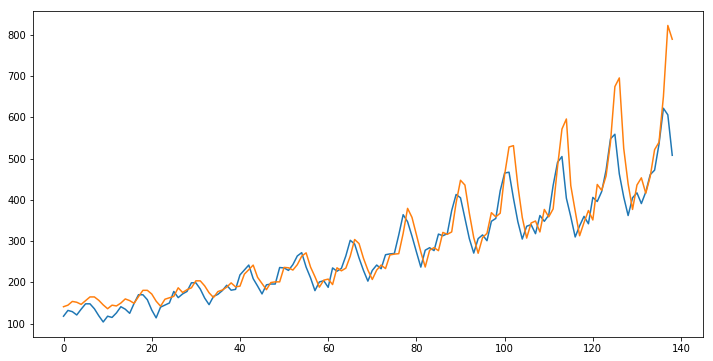

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.plot(predict)
plt.show()

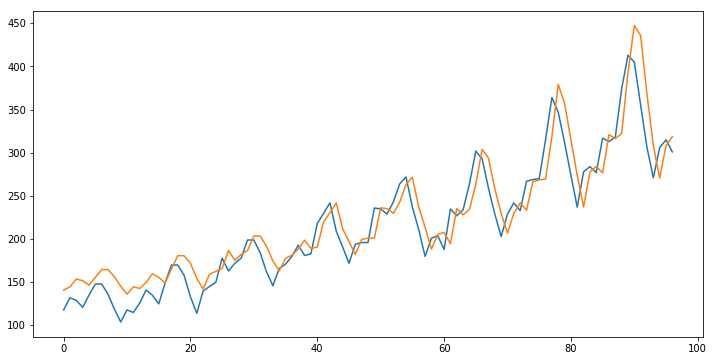

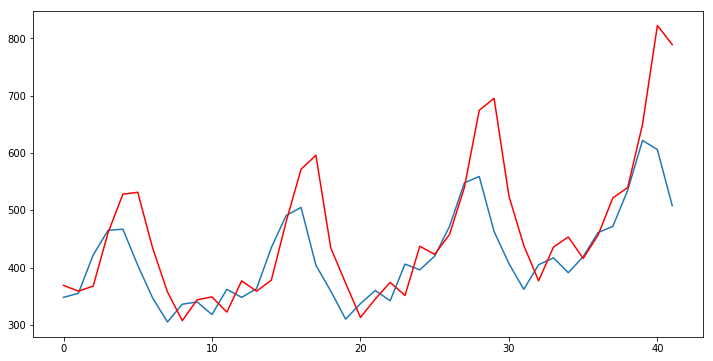

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(testY)
plt.plot(testPredict,'r')
plt.show()

In [65]:
plt.figure(figsize=(12, 6))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'m')
plt.plot(testPredictPlot,'r')
plt.show()

ValueError: could not broadcast input array from shape (42,1) into shape (40,1)